# Proyek Analisis Data: Bike Sharing Dataset
- Nama: MUHAMMAD ALVARO KHIKMAN
- Email: alvarokhikman01@gmail.com
- Id Dicoding: alvaro0106

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan jumlah pengguna sepeda di tahun 2021 dan tahun 2022?
- Berapa persentase rata-rata jumlah penyewa sepeda berdasarkan musim?
- Di hari apa penyewaan sepeda paling ramai?

## Menyiapkan semua library yang dibutuhkan

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

buat variabel "day" kemudian import file "day" kedalamnya <br>
buat variabel "hour" kemudian import file "hour" kedalamnya <br>
menampilkan 5 record teratas data "day" <br>
menampilkan 5 record teratas data "hour" <br>

In [19]:
day = pd.read_csv('data/day.csv') 
hour = pd.read_csv('data/hour.csv') 
day.head() 
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [20]:
day.info() # Cek null value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [21]:
day.isna().sum() # Menghitung kolom yang memiliki null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
day.duplicated().sum() # Cek duplikasi record

0

In [23]:
day.describe() # Statistik deskriptif data day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [24]:
hour.info() # cek null dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [25]:
hour.isna().sum() # menghitung kolom yang memiliki null value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [26]:
hour.duplicated().sum() # menghitung duplikasi data

0

In [27]:
hour.describe() # statistik deskriptif data hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Hasil Assesing Data :
Pada data day :
    Tipe data pada kolom dteday adalah object
    Tidak memiliki missing value
    Tidak memiliki duplikasi data
Pada data hour :
    Tipe data pada kolom dteday adalah object
    Tidak memiliki missing value
    Tidak memiliki duplikasi data
Sehingga akan dilanjutkan dengan Cleaning data :

In [28]:
# Mengganti tipe data kolom dteday pada day dan hour menjadi datetime
day_column = ["dteday"]
for column in day_column:
    day[column] = pd.to_datetime(day[column])

hour_column = ["dteday"]
for column in hour_column:
    hour[column] = pd.to_datetime(hour[column])

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
day.head() # Melihat 5 record teratas data day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
day.describe() # statistik deskriptif

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


<Axes: >

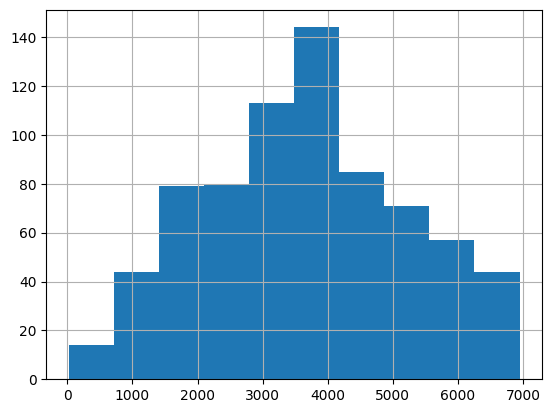

In [31]:
day["registered"].hist() #data kolom registered pada data day berdistribusi normal

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

- Bagaimana perkembangan jumlah pengguna sepeda di tahun 2021 dan tahun 2022?

In [32]:
result = day.groupby(["yr", "mnth"])["cnt"].sum().reset_index()
result

,yr,mnth,cnt
0,0,1,38189
1,0,2,48215
2,0,3,64045
3,0,4,94870
4,0,5,135821
5,0,6,143512
6,0,7,141341
7,0,8,136691
8,0,9,127418
9,0,10,123511


In [33]:
bulan = {1:"Januari", 2:"Februari", 3:"Maret", 4:"April", 5:"Mei", 6:"Juni", 7:"Juli", 8:"Agustus", 9:"September", 10:"Oktober", 11:"November", 12:"Desember"}
result["mnth"] = result["mnth"].map(bulan)

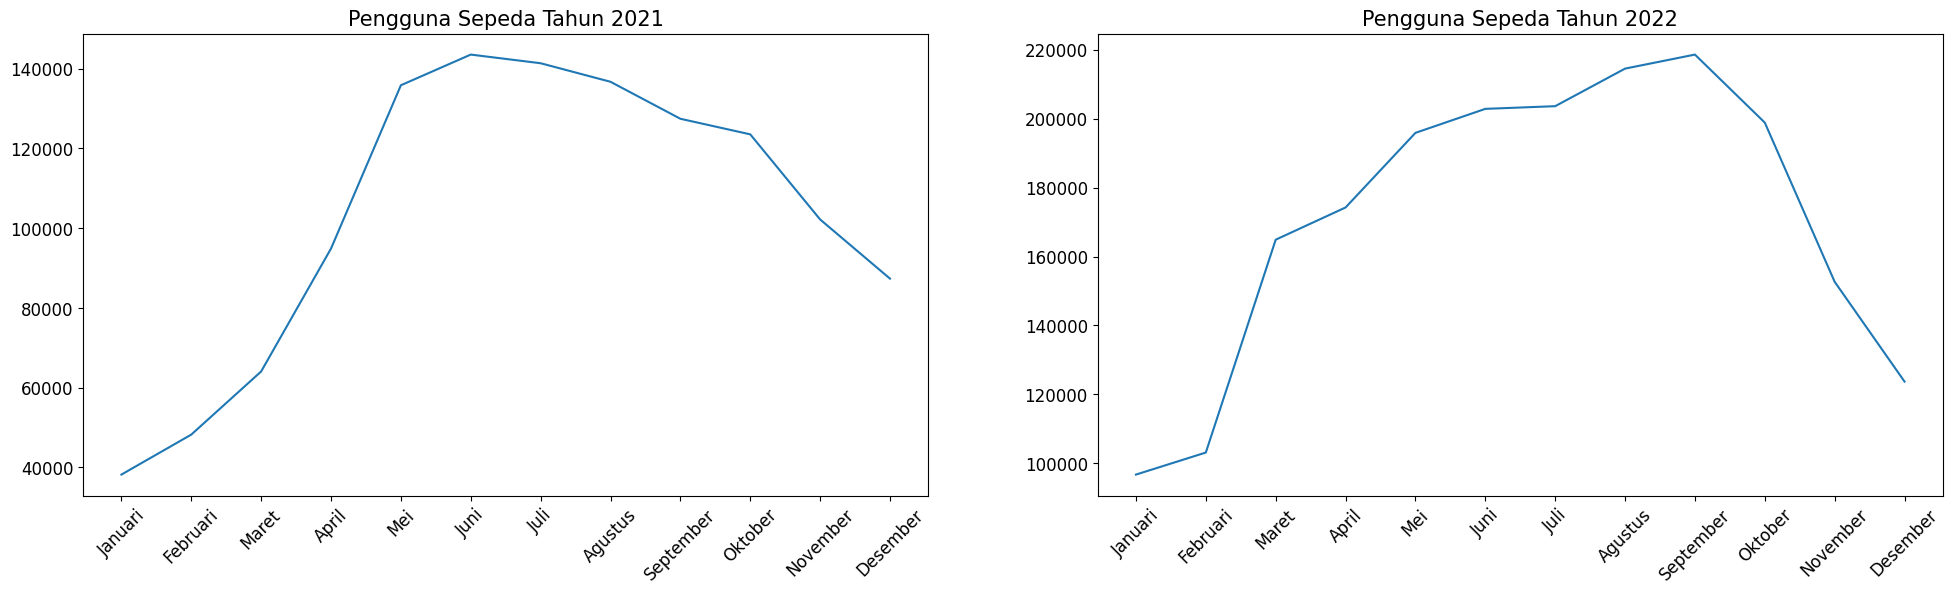

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
sns.lineplot(data=result[result['yr']==0], x='mnth', y='cnt',ax=ax[0] )
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pengguna Sepeda Tahun 2021", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12, rotation=45)

sns.lineplot(data=result[result['yr']==1], x='mnth', y='cnt' ,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Pengguna Sepeda Tahun 2022", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)

plt.show()

### Pertanyaan 2: 

- Berapa persentase rata-rata jumlah pengguna sepeda berdasarkan musim?

In [35]:
result_mean_by_season = day.groupby(by="season")["cnt"].mean().reset_index()
result_mean_by_season

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


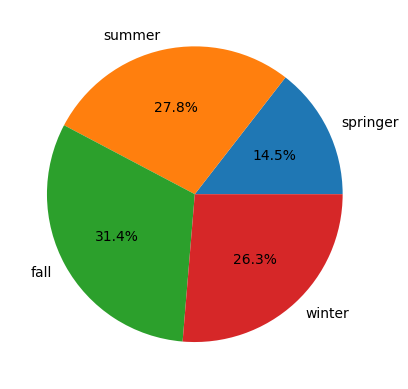

In [36]:
# season : season (1:springer, 2:summer, 3:fall, 4:winter)

labels = ("springer","summer","fall", "winter")
plt.pie(
    x=result_mean_by_season["cnt"],
    labels=labels,
    autopct='%1.1f%%'
)
plt.show()

### Pertanyaan 3:

- Di hari apa pengguna sepeda paling banyak?

In [37]:
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [38]:
result = hour.groupby(["weekday"])["cnt"].sum()
result

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

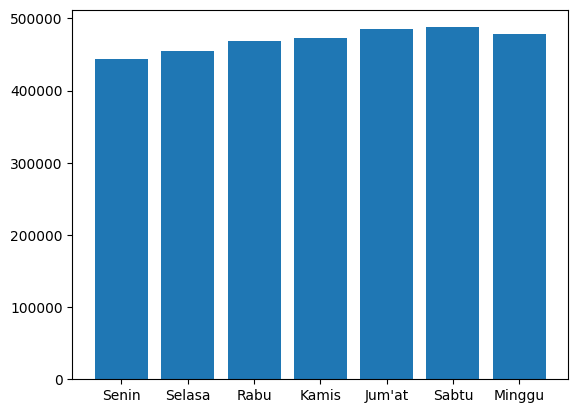

In [39]:
hari = ("Senin", "Selasa", "Rabu", "Kamis", "Jum'at", "Sabtu", "Minggu")
plt.bar(x=hari, height=result)
plt.show()

## Conclusion

conclusion pertanyaan 1 : Bagaimana perkembangan jumlah pengguna sepeda di tahun 2021 dan tahun 2022? => Pengguna sepeda pada tahun 2021 memiliki lonjakan yang cukup ekstrem, dimana pada awal tahun tren pengguna sepeda paling sedikit, puncak tren pengguna tertinggi pada bulan juni, dan pada akhir tahun mengalami penurunan yang sangat signifikan 

conclusion pertanyaan 2 : Berapa persentase rata-rata jumlah pengguna sepeda berdasarkan musim? => pengguna sepeda paling banyak di musim fall (gugur) sebesar 31.4%, dan paling sedikit pada musim springer (semi) sebesar 14.5%

conclusion pertanyaan 3: Di hari apa pengguna sepeda paling banyak? => Pengguna sepeda paling banyak di hari Sabtu, dan paling sedikit di hari senin

### Data untuk dashboard

In [42]:
main_data = pd.merge(day, hour, on=["dteday"], how="left" )

In [43]:
main_data.to_csv("dashboard/main_data.csv", index=False)